In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df_train = pd.read_csv("cardio_train_4.csv")
df_train.head(5)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,19507,female,158,104.0,150,90,normal,normal,no,yes,yes,1
1,16749,female,179,89.0,120,80,normal,normal,no,no,no,0
2,20413,female,156,65.0,100,70,normal,normal,no,no,yes,1
3,21129,female,154,71.0,150,80,normal,normal,no,no,no,1
4,20300,female,164,84.0,120,80,normal,normal,no,no,yes,0


In [3]:
# Loading test data from csv files and list the first 5 rows
df_test = pd.read_csv("cardio_test.csv")
df_test.head(5)

,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18353,male,150,52.0,120,80,normal,normal,no,no,no,0
1,19104,female,164,70.0,140,90,normal,normal,no,no,yes,1
2,21216,male,176,91.0,140,80,above normal,normal,no,no,yes,1
3,19645,female,149,61.0,150,80,above normal,normal,no,no,no,1
4,18986,female,149,70.0,140,90,normal,normal,no,no,no,1


Inspecting data with Pandas
Discover the size of the dataset, the data types of the attributes and the statistics of the dataset:

In [4]:
# Size of train set and test set
print('Size of train set: ', df_train.shape)
print('Size of test set: ', df_test.shape)

Size of train set:  (10000, 12)
Size of test set:  (10000, 12)


In [5]:
# List data types of feature columns
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          10000 non-null  int64  
 1   sex          10000 non-null  object 
 2   height       10000 non-null  int64  
 3   weight       10000 non-null  float64
 4   ap_hi        10000 non-null  int64  
 5   ap_lo        10000 non-null  int64  
 6   cholesterol  10000 non-null  object 
 7   gluc         10000 non-null  object 
 8   smoke        10000 non-null  object 
 9   alco         10000 non-null  object 
 10  active       10000 non-null  object 
 11  cardio       10000 non-null  int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 937.6+ KB


In [6]:
# Look at the statistical of the dataset 
df_train.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
age,10000.0,19474.789600,2462.239762,14291.0,17685.25,19702.5,21303.0,23690.0
height,10000.0,164.454200,8.087141,60.0,159.00,165.0,170.0,207.0
weight,10000.0,74.181644,14.232392,21.0,65.00,72.0,82.0,172.0
ap_hi,10000.0,132.249200,260.998738,7.0,120.00,120.0,140.0,14020.0
ap_lo,10000.0,96.299000,167.118392,0.0,80.00,80.0,90.0,8099.0
cardio,10000.0,0.502700,0.500018,0.0,0.00,1.0,1.0,1.0


Exploratory Data Analysis (EDA)
Univariate EDA
Numerical variable
Nominal variable
Multivariate EDA

Univariate EDA
Histogram plot and count plot can be used to visualize the distribution of numerical and nominal variables, respectively.

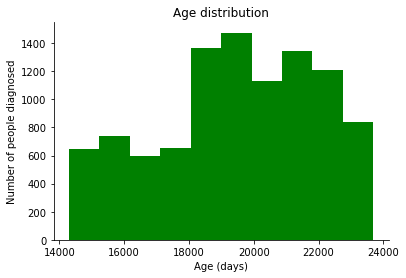

In [7]:
# Histogram of age in the dataset
ax = df_train['age'].plot.hist(bins=10, color='g', grid=False)
ax.set_title("Age distribution")
ax.set_xlabel('Age (days)')
ax.set_ylabel('Number of people diagnosed')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

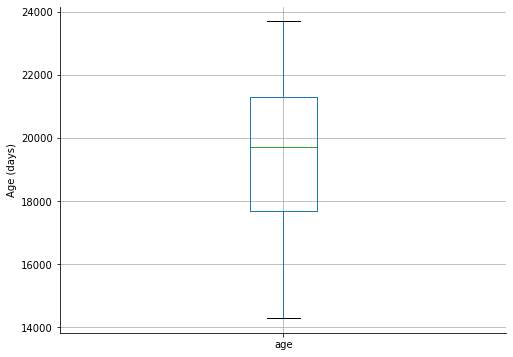

In [8]:
# boxplot of age in the dataset
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

ax = df_train[['age']].boxplot()

ax.set_ylabel('Age (days)')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

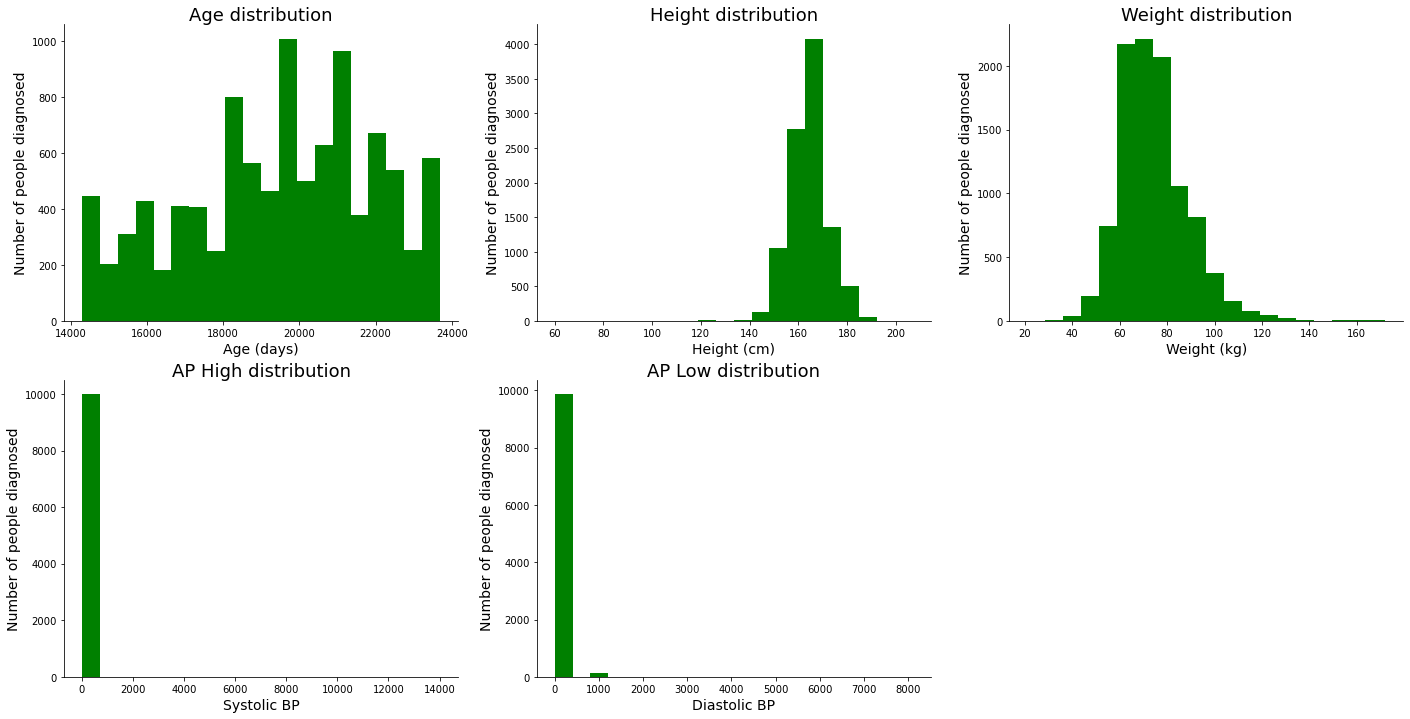

In [9]:
# Histogram plot of all numerical attributes in the train set
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
names = ['Age', 'Height', 'Weight', 'AP High', 'AP Low']
y_names = ['Age (days)', 'Height (cm)', 'Weight (kg)', 'Systolic BP', 'Diastolic BP']

fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)



ax_list = [ax1, ax2, ax3, ax4, ax5]

for i in range(5):
    ax = ax_list[i]
    df_train[columns[i]].hist(bins=20,ax=ax, color='g', grid=False )
    ax.set_title(names[i] + ' distribution', pad=-5, fontsize=18)
    ax.set_xlabel(y_names[i], fontsize=14)
    ax.set_ylabel('Number of people diagnosed', fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

In [10]:
#Count the target values to check the balance
df_train['cardio'].value_counts()


1    5027
0    4973
Name: cardio, dtype: int64

In [11]:
df_train['sex'].value_counts()

female    6450
male      3550
Name: sex, dtype: int64

In [12]:
df_train['cholesterol'].value_counts()

normal               7500
above normal         1361
well above normal    1139
Name: cholesterol, dtype: int64

In [13]:
df_train['gluc'].value_counts()

normal               8505
well above normal     755
above normal          740
Name: gluc, dtype: int64

In [14]:
df_train['smoke'].value_counts()

no     9122
yes     878
Name: smoke, dtype: int64

In [15]:
df_train['alco'].value_counts()

no     9483
yes     517
Name: alco, dtype: int64

In [16]:
df_train['active'].value_counts()

yes    8076
no     1924
Name: active, dtype: int64

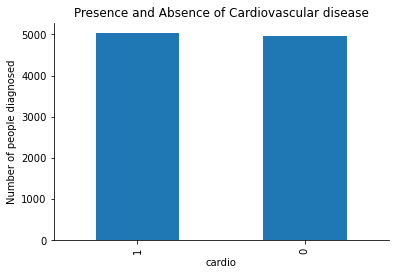

In [17]:
# The bar plot shows the number of people have chronic kidney disease and non-chronic kidney disease
ax=df_train['cardio'].value_counts().plot.bar()

ax.set_title("Presence and Absence of Cardiovascular disease")
ax.set_xlabel('cardio')
ax.set_ylabel('Number of people diagnosed')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

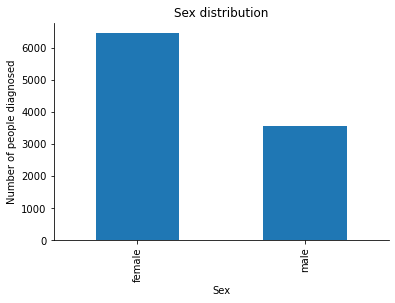

In [18]:
# The bar plot shows the number of people diagnosed with different sg values
ax=df_train['sex'].value_counts().plot.bar()

ax.set_title("Sex distribution")
ax.set_xlabel('Sex')
ax.set_ylabel('Number of people diagnosed')
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

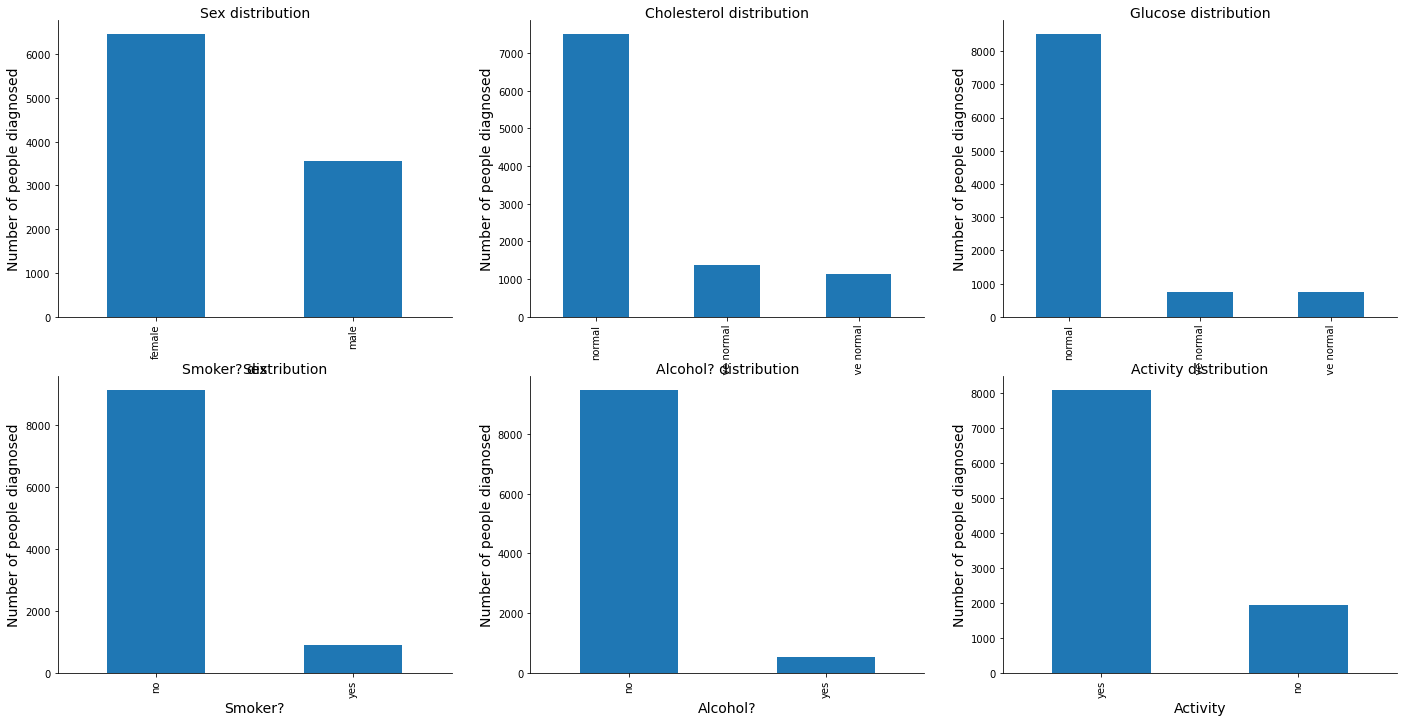

In [19]:
# bar plot of categorical attributes in the train set
columns = ['sex', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
names = ['Sex', 'Cholesterol', 'Glucose', 'Smoker?', 'Alcohol?', 'Activity']

fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(6):
    ax = ax_list[i]
    df_train[columns[i]].value_counts().plot.bar(ax=ax)

    ax.set_title(names[i] + ' distribution', pad=-10, fontsize=14)
    ax.set_ylabel('Number of people diagnosed', fontsize=14)
    ax.set_xlabel(names[i], fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

Bivariate EDA
Univariate graphs by target labels (notckd and ckd)

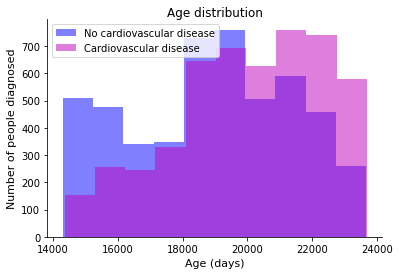

In [20]:
# Histogram of Age corresponding to two labels (notckd and ckd)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

# Histogram of Age for people diagnosed not with cardio vascular disease
df_train[df_train['cardio']==0]['age'].plot.hist(color='b', ax=ax, label='No cardiovascular disease',alpha=0.5)

# Histogramof Age for people diagnosed with cardio vascular disease
df_train[df_train['cardio']==1]['age'].plot.hist(color='m', ax=ax, label='Cardiovascular disease', alpha=0.5)


ax.set_title("Age distribution", pad=-5, fontsize=12)
ax.set_xlabel('Age (days)', fontsize=11)
ax.set_ylabel('Number of people diagnosed', fontsize=11)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()

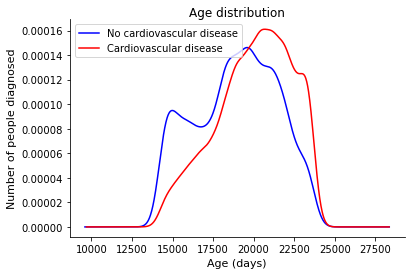

In [21]:
# Density plot for Age corresponding to two labels (notckd and ckd)
fig = plt.figure(figsize=(6,4))
ax = fig.add_subplot(111)

# kdeplot of Age for people diagnosed as notckd
df_train[df_train['cardio']==0]['age'].plot.kde(color='b', ax=ax, label='No cardiovascular disease')

# kdeplot of Age for people diagnosed as ckd
df_train[df_train['cardio']==1]['age'].plot.kde(color='r', ax=ax, label='Cardiovascular disease')


ax.set_title("Age distribution", pad=-5, fontsize=12)
ax.set_xlabel('Age (days)', fontsize=11)
ax.set_ylabel('Number of people diagnosed', fontsize=11)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.legend()

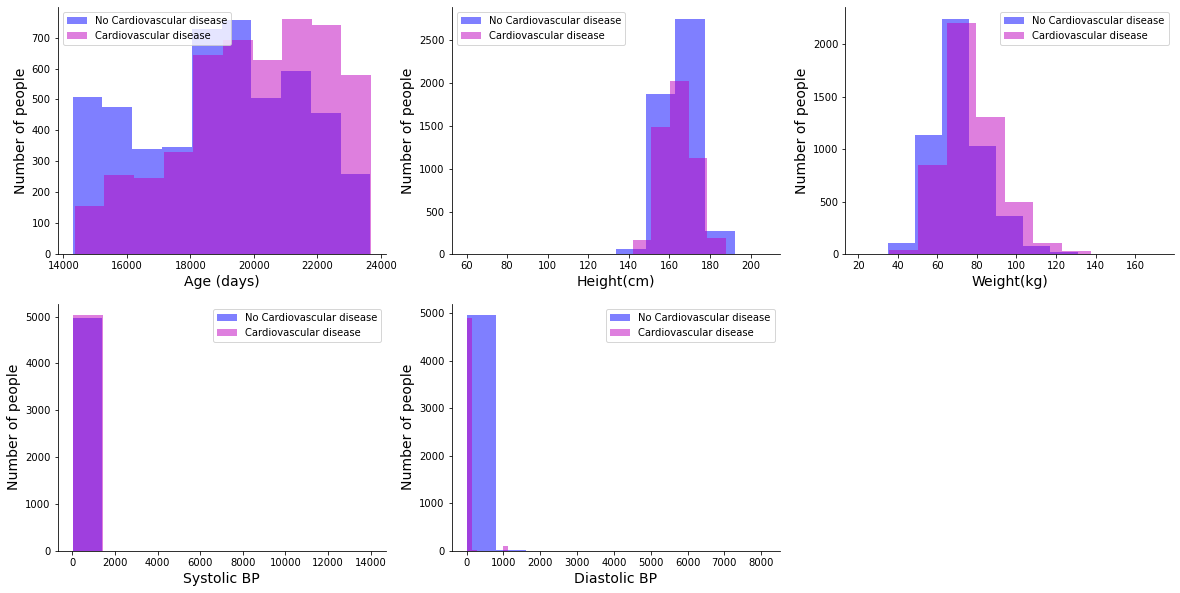

In [22]:
# Distribution of all numerical variables by target values
columns = ['age', 'height', 'weight', 'ap_hi', 'ap_lo', 'sex']

x_labels = ['Age (days)', 'Height(cm)', 'Weight(kg)', 'Systolic BP', 'Diastolic BP', 'Sex']
         

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)

ax_list = [ax1, ax2, ax3, ax4, ax5]

for i in range(5):
    ax = ax_list[i]
    df_train[df_train['cardio']==0][columns[i]].plot.hist(color='b', ax=ax, label='No Cardiovascular disease', alpha=0.5)
    df_train[df_train['cardio']==1][columns[i]].plot.hist(color='m', ax=ax, label='Cardiovascular disease', alpha=0.5)

    ax.legend()
    ax.set_xlabel(x_labels[i], fontsize=14)
    ax.set_ylabel("Number of people", fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

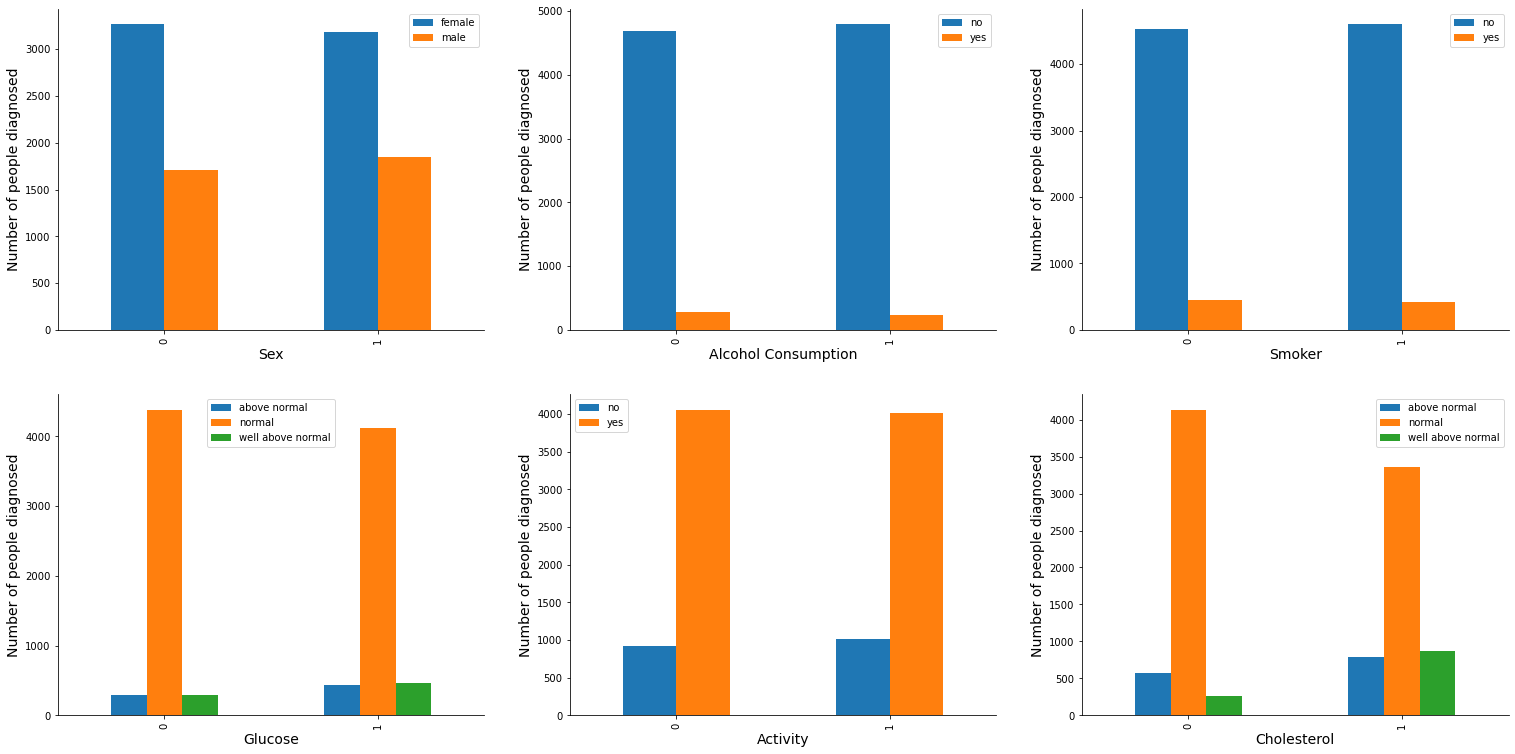

In [23]:
# Distribution of categorical variables by target values
columns = ['sex', 'alco', 'smoke', 'gluc', 'active', 'cholesterol']
x_labels = ['Sex', 'Alcohol Consumption', 'Smoker', 'Glucose','Activity', 'Cholesterol']

fig = plt.figure(figsize=(26,13))
ax1 = fig.add_subplot(231)
ax2 = fig.add_subplot(232)
ax3 = fig.add_subplot(233)
ax4 = fig.add_subplot(234)
ax5 = fig.add_subplot(235)
ax6 = fig.add_subplot(236)

ax_list = [ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(6):
    ax = ax_list[i]
    df_train[[columns[i],'cardio']].groupby(['cardio',columns[i]]).size().unstack().plot.bar(ax=ax)
    ax.legend()
    ax.set_xlabel(x_labels[i], fontsize=14)
    ax.set_ylabel("Number of people diagnosed", fontsize=14)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)

5. Cleaning and Featuring
Cleaning involves dealing with missing values. If the number of missing values is small, we fill them with the mode for categorical features and with the mean for numerical features

Featuring involves transforming data: Converting categorical values to numerical values

In [24]:
# Counting the number of missing values in each column of train set
df_train.isnull().sum()

age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [25]:
# Counting the number of missing values in each column of test set
df_test.isnull().sum()

age            0
sex            0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

0 Missing Values therefore we do not need to drop or fill any variables.

Featuring
Convert categorical values to numerical values

In [26]:
df_train['cholesterol'] = df_train['cholesterol'].map({'normal':0, 'above normal': 1, 'well above normal' : 2})
df_test['cholesterol'] = df_test['cholesterol'].map({'normal':0, 'above normal': 1, 'well above normal' : 2})

In [27]:
df_train['gluc'] = df_train['gluc'].map({'normal':0, 'above normal': 1, 'well above normal' : 2})
df_test['gluc'] = df_test['gluc'].map({'normal':0, 'above normal': 1, 'well above normal' : 2})

In [28]:
df_train['smoke'] = df_train['smoke'].map({'no':0, 'yes': 1})
df_test['smoke'] = df_test['smoke'].map({'no':0, 'yes': 1})

In [29]:
df_train['alco'] = df_train['alco'].map({'no':0, 'yes': 1})
df_test['alco'] = df_test['alco'].map({'no':0, 'yes': 1})

In [30]:
df_train['sex'] = df_train['sex'].map({'female':0, 'male': 1})
df_test['sex'] = df_test['sex'].map({'female':0, 'male': 1})

In [31]:
df_train['active'] = df_train['active'].map({'no':0, 'yes': 1})
df_test['active'] = df_test['active'].map({'no':0, 'yes': 1})

In [32]:
df_train['cardio'] = df_train['cardio'].map({0:0, 1: 1})
df_test['cardio'] = df_test['cardio'].map({0:0, 1: 1})

In [33]:
# Separate feature columns and label columns for training and evaluating
X_train = df_train.drop('cardio', axis=1) # features
y_train = df_train['cardio']            # labels

X_test = df_test.drop('cardio', axis=1)
y_test = df_test['cardio']

5-6. Modeling and Evaluating

In [34]:
# Import APIs from scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.neighbors import KNeighborsClassifier  #import k-Nearest Neighbor model from scikit-learn library 
from sklearn.linear_model import LogisticRegression #import Logistic Regression model from scikit-learn library 
from sklearn.tree import DecisionTreeClassifier     #import Decision Tree model from scikit-learn library 

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

import seaborn as sns

Scaling features

In [35]:
# Scale features 
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

K-Nearest Neighbor Model
Varying the number of neighbors (n_neighbors) to obtain the best performance

In [36]:
# Call the K-nearest model
KNN = KNeighborsClassifier(n_neighbors=5)   # Adjust n_neighbors to see the performance

# Fit the model on train set
KNN.fit(X_train_scaled, y_train)           

# Use the trained model to predict the outcomes of test set
y_predict_knn = KNN.predict(X_test_scaled)

# Compute the evaluation metrics
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_knn)))
print('Precision: {}'.format(precision_score(y_test, y_predict_knn)))
print('Recall: {}'.format(recall_score(y_test, y_predict_knn)))

Accuracy: 0.6054
Precision: 0.5984639621898385
Recall: 0.6144359078042863


Visualizing confusion matrix

Text(33.0, 0.5, 'True')

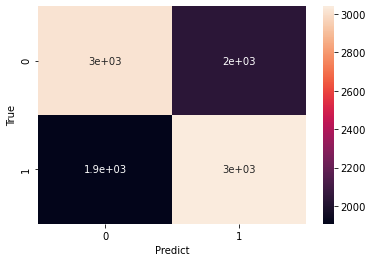

In [37]:
cm_knn = confusion_matrix(y_test, y_predict_knn)
                          
# Transform to df for easier plotting
cm_knn_df = pd.DataFrame(cm_knn,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(6,4))
sns.heatmap(cm_knn_df, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")


Logistic Regression Model

In [38]:
# Call the Logistic Regression model
LR = LogisticRegression()  

# Fit the model on train set
LR.fit(X_train_scaled, y_train)            # 

# Use the trained model to predict the outcomes of test set
y_predict_lr = LR.predict(X_test_scaled)

# Compute the evaluation metrics
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_lr)))
print('Precision: {}'.format(precision_score(y_test, y_predict_lr)))
print('Recall: {}'.format(recall_score(y_test, y_predict_lr)))

Accuracy: 0.6442
Precision: 0.6455536912751678
Recall: 0.6223210675293166


Visualizing confusion matrix

Text(33.0, 0.5, 'True')

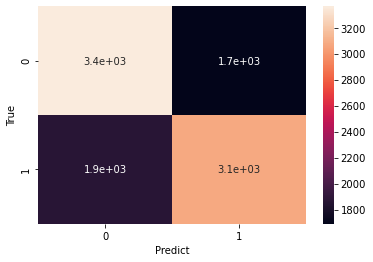

In [39]:
cm_lr = confusion_matrix(y_test, y_predict_lr)
                          
# Transform to df for easier plotting
cm_lr_df = pd.DataFrame(cm_lr,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(6,4))
sns.heatmap(cm_lr_df, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")

Decision Tree Model

In [40]:
# Call the Decision Tree model
DT = DecisionTreeClassifier() 

# Fit the model on train set. It is suggested to train the model on the unscaled train set.
DT.fit(X_train, y_train)  

# Use the trained model to predict the outcomes of test set
y_predict_dt = DT.predict(X_test)

# Compute the evaluation metrics
print('Accuracy: {}'.format(accuracy_score(y_test, y_predict_dt)))
print('Precision: {}'.format(precision_score(y_test, y_predict_dt)))
print('Recall: {}'.format(recall_score(y_test, y_predict_dt)))

Accuracy: 0.6334
Precision: 0.624804992199688
Recall: 0.6477961989486454


Visualizing confusion matrix

Text(33.0, 0.5, 'True')

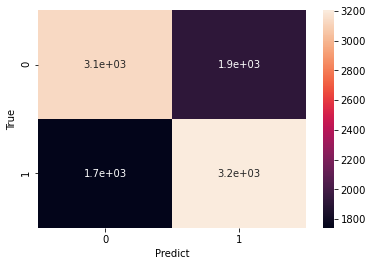

In [41]:
cm_dt = confusion_matrix(y_test, y_predict_dt)
                          
# Transform to df for easier plotting
cm_dt_df = pd.DataFrame(cm_dt,
                     index = [0,1], 
                     columns = [0,1])

plt.figure(figsize=(6,4))
sns.heatmap(cm_dt_df, annot=True)
plt.xlabel("Predict")
plt.ylabel("True")